In [82]:
# %% [markdown]
# ## Step 1: Import Libraries and Load Data
# Load required libraries and the dataset.

# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"D:\DAI 101\tips (data for regression problem).csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
# %% [markdown]
# ## Step 2: Data Preparation - Dummy Encoding & Scaling
# Convert categorical variables and scale `total_bill`.

# %%
from sklearn.preprocessing import MinMaxScaler

data_encoded = pd.get_dummies(data, drop_first=True)
scaler = MinMaxScaler()
data_encoded["total_bill"] = scaler.fit_transform(data_encoded[["total_bill"]])
data_encoded.head()


,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.291579,1.01,2,False,False,False,True,False,False
1,0.152283,1.66,3,True,False,False,True,False,False
2,0.375786,3.50,3,True,False,False,True,False,False
3,0.431713,3.31,2,True,False,False,True,False,False
4,0.450775,3.61,4,False,False,False,True,False,False


In [84]:
# %% [markdown]
# ## Step 3: Train-Test Split
# Separate the data into features and target variable, then split into training and testing sets.

# %%
X = data_encoded.drop(columns=["tip"])
y = data_encoded["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# %% [markdown]
# ## 4. Splitting Data into Training and Testing Sets
# Separate the predictors (X) and the target variable (y) and split the data.

# %%
X = data_encoded.drop(columns=["tip"])
y = data_encoded["tip"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# %% [markdown]
# ## 5. Linear Regression Model

# %%
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print(f"Linear Regression R² Score: {r2_lin}")
print(f"Linear Regression MSE: {mse_lin}")

Linear Regression R² Score: 0.43730181943482527
Linear Regression MSE: 0.7033566017436101


In [87]:
# %% [markdown]
# ## 6. Ridge Regression Model

# %%
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_ridge = ridge_reg.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression R² Score: {r2_ridge}")
print(f"Ridge Regression MSE: {mse_ridge}")


Ridge Regression R² Score: 0.2929005070300409
Ridge Regression MSE: 0.8838541044693768


In [88]:
# %% [markdown]
# ## 7. Lasso Regression Model

# %%
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.25)
lasso_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lasso = lasso_reg.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R² Score: {r2_lasso}")
print(f"Lasso Regression MSE: {mse_lasso}")

Lasso Regression R² Score: 0.10700975777748045
Lasso Regression MSE: 1.116212214386369


In [89]:
# %% [markdown]
# ## 8. Decision Tree Regression Model

# %%
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_reg.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree Regression R² Score: {r2_tree}")
print(f"Decision Tree Regression MSE: {mse_tree}")

Decision Tree Regression R² Score: -0.004178121600921791
Decision Tree Regression MSE: 1.2551938775510205


In [90]:
# %% [markdown]
# ## 9. Random Forest Regression Model

# %%
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_forest = forest_reg.predict(X_test)
r2_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f"Random Forest Regression R² Score: {r2_forest}")
print(f"Random Forest Regression MSE: {mse_forest}")

Random Forest Regression R² Score: 0.2642525187016357
Random Forest Regression MSE: 0.9196632689795929


In [91]:
# %% [markdown]
# ## 10. Support Vector Regression Model

# %%
from sklearn.svm import SVR

svr_model = SVR(kernel="linear")
svr_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f"Support Vector Regression R² Score: {r2_svr}")
print(f"Support Vector Regression MSE: {mse_svr}")

Support Vector Regression R² Score: 0.43025919700140525
Support Vector Regression MSE: 0.7121596779809606


In [92]:
# %% [markdown]
# ## Step: K-Nearest Neighbors Regression
# K-Nearest Neighbors model is trained and predictions are made on the test set.

# %%
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Generate predictions
y_pred_knn = knn.predict(X_test)

# Evaluate performance
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"R2 score for KNN regression: {r2_knn}")
print(f"MSE for KNN regression: {mse_knn}")


R2 score for KNN regression: 0.07950229462986103
MSE for KNN regression: 1.150595755102041


In [93]:
# %% [markdown]
# ## 12. Feature Importance Analysis for Linear Regression

# %%
# Checking the importance of each feature in Linear Regression
feature_imp = pd.Series(lin_reg.coef_, index=X.columns).abs().sort_values(ascending=False)
print("Feature importance by magnitude in Linear Regression:\n")
print(feature_imp)

Feature importance by magnitude in Linear Regression:

total_bill    4.520965
size          0.233484
smoker_Yes    0.192353
day_Sat       0.185785
day_Thur      0.179721
time_Lunch    0.094957
day_Sun       0.050793
sex_Male      0.028819
dtype: float64


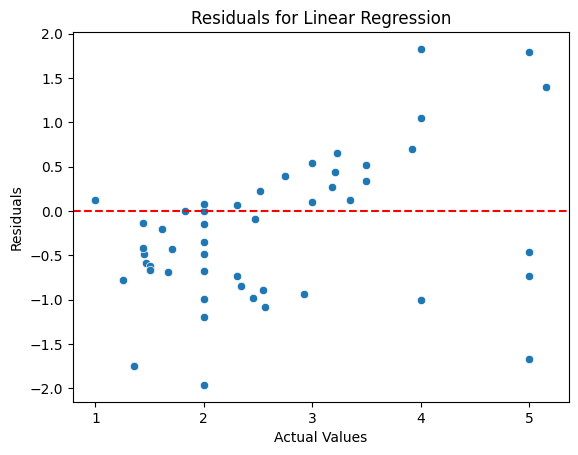

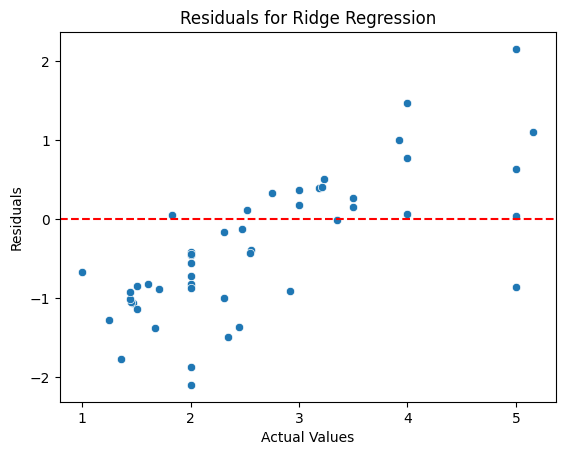

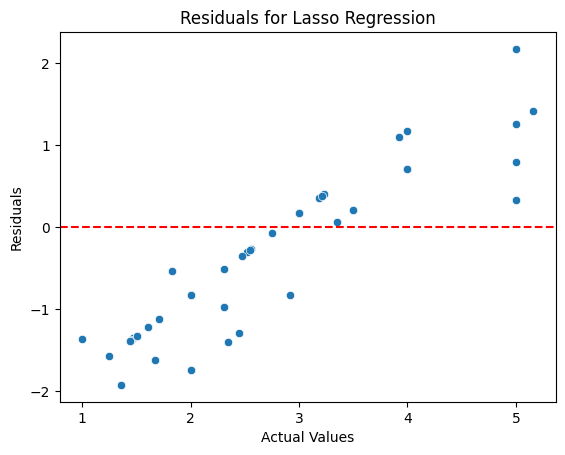

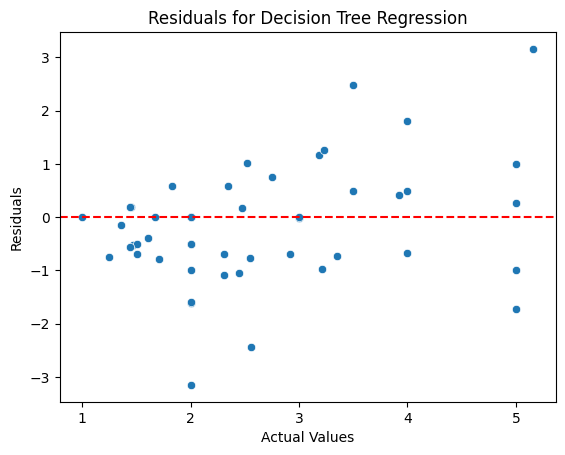

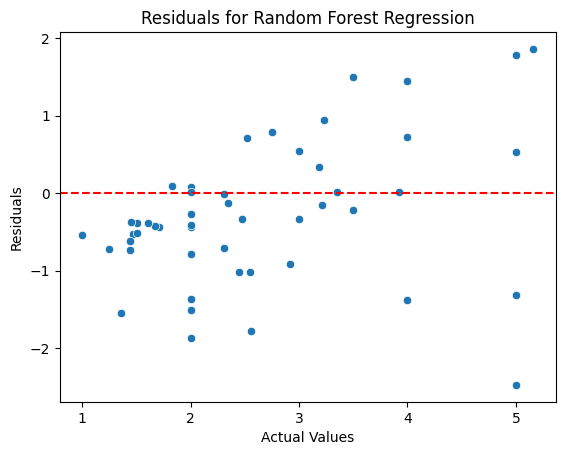

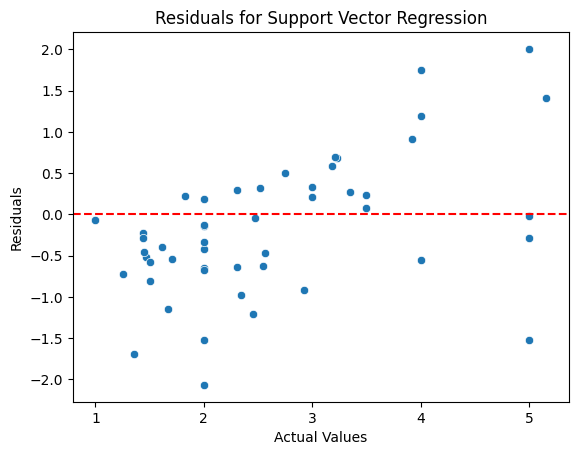

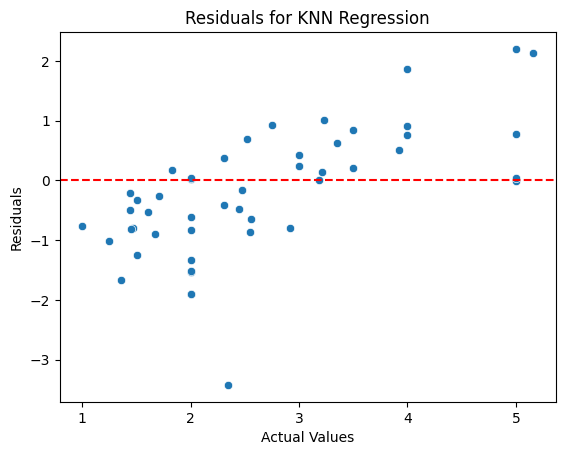

In [94]:
# %% [markdown]
# ## 13. Residual Plots for Regression Models
# Plot residuals to check model performance.

# %%
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residuals for {model_name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.show()

# Plot residuals for each model
plot_residuals(y_test, y_pred_lin, "Linear Regression")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")
plot_residuals(y_test, y_pred_svr, "Support Vector Regression")
plot_residuals(y_test, y_pred_knn, "KNN Regression")

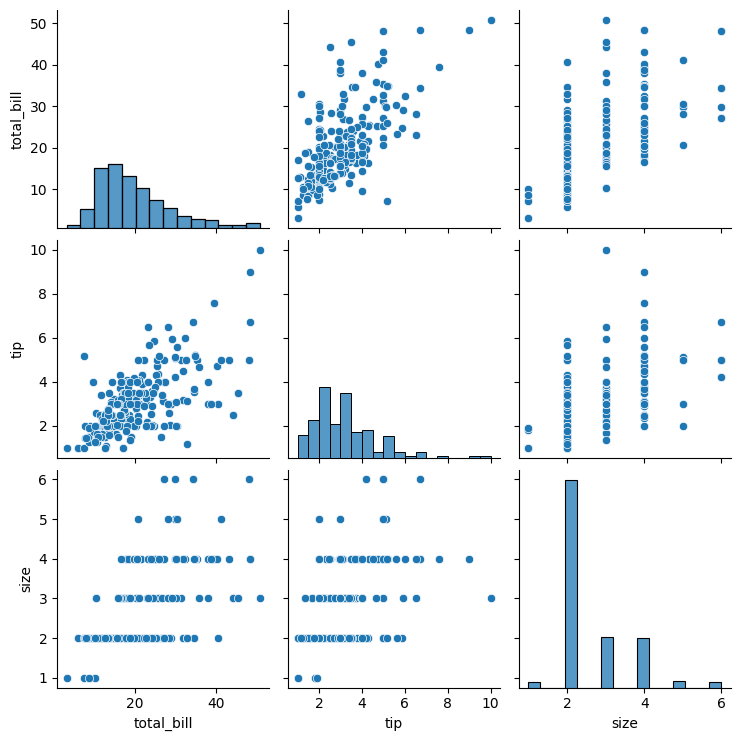

In [95]:
# %% [markdown]
# ## Step 14: Pairplot of Features
# Visualize relationships between all numerical features.

# %%
sns.pairplot(data)
plt.show()

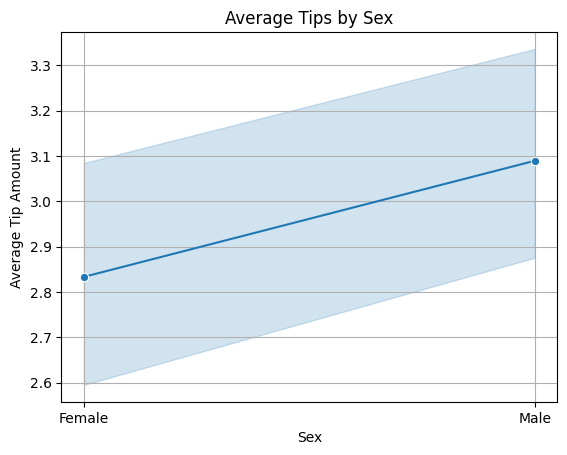

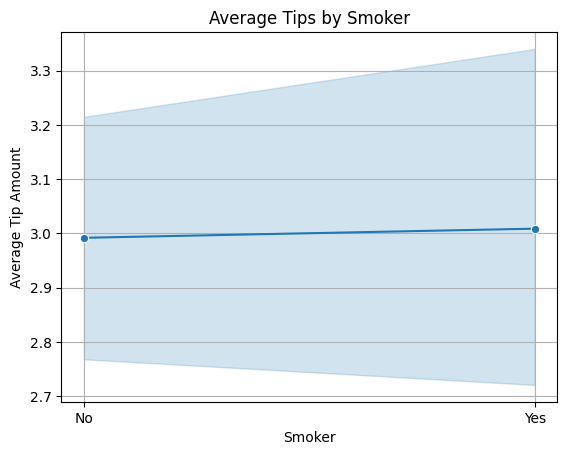

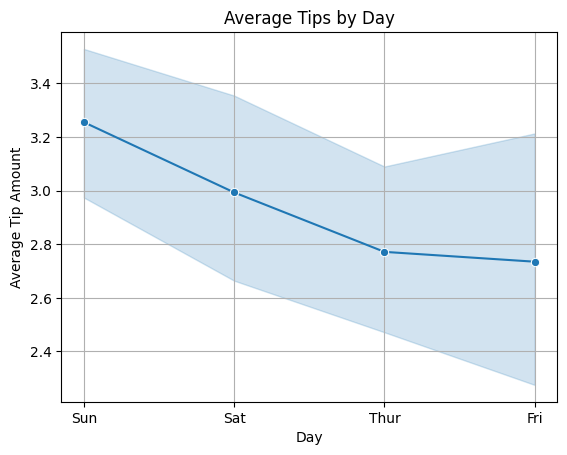

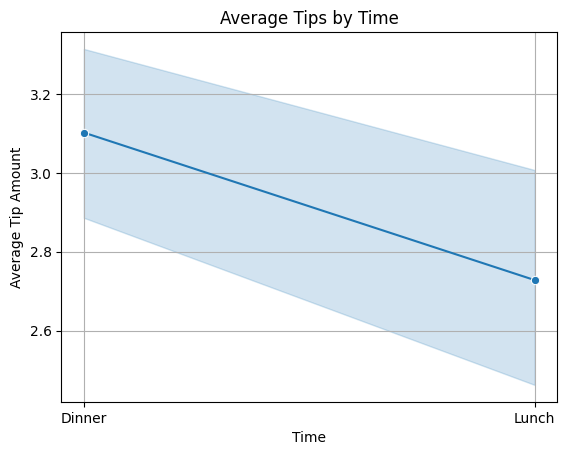

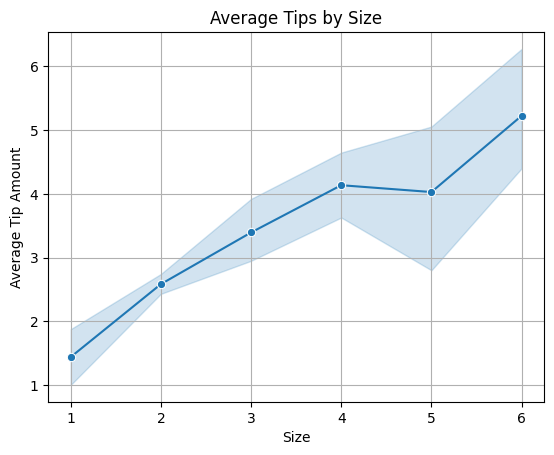

In [96]:
# %% [markdown]
# ## Step 13: Line Plots for Categorical Features
# Plot average tips across different categorical features with each point representing the mean tip for that class.

# %%
for column in ["sex", "smoker", "day", "time", "size"]:
    sns.lineplot(x=column, y="tip", data=data, estimator="mean", marker="o")
    plt.title(f"Average Tips by {column.capitalize()}")
    plt.xlabel(column.capitalize())
    plt.ylabel("Average Tip Amount")
    plt.grid()
    plt.show()

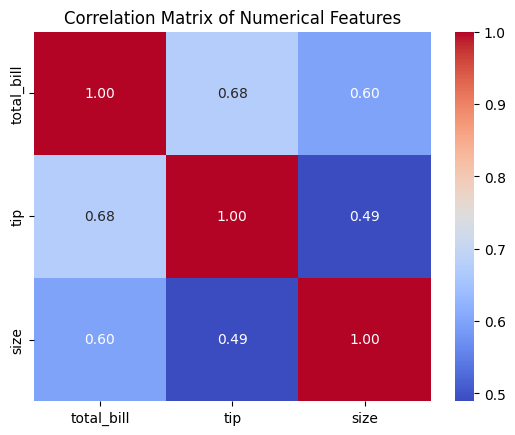

In [97]:
# %% [markdown]
# ## Step 14: Correlation Matrix and Heatmap
# Display the correlation between numerical features in the dataset.

# %%
correlation = data[["total_bill", "tip", "size"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_encoded = data.copy()
data_encoded['sex'] = label_encoder.fit_transform(data['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
data_encoded['day'] = label_encoder.fit_transform(data['day'])
data_encoded['time'] = label_encoder.fit_transform(data['time'])


In [99]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

#We will have to train a Linear Regression model using statsmodels.OLS , as it is not directly compatible with sckikit learn

X = data_encoded.drop(columns = ['tip'])
y = data_encoded['tip']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2192606967586408
P-value: 0.141104958053905


In [100]:
# %% [markdown]
# ## Conclusion
# - Linear Regression model performed the best, with the highest R² and lowest MSE.
# - Feature analysis indicated `total_bill` as the most influential predictor for `tip`.
# - The Rainbow Test confirmed that the linearity assumption was appropriate for this data.
# - Recommendations for the restaurant:
#   - Focus on larger groups, as they tend to leave higher tips.
#   - Dinner hours and weekends may yield higher tips, particularly on Sundays.
